In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

Matplotlib is building the font cache; this may take a moment.


In [27]:
df = pd.read_csv('/Users/boscoll/Downloads/Fig3h_main_forest_plot 1.csv', index_col=0)

In [28]:
order = [
        'RB1_het_loss_uni',
    'RB1_het_loss',
       'RB1_Other_LOH_uni',
    'RB1_Other_LOH', 
        'RB1_OS_het_loss',
    'RB1_OS_het_loss_multi',
    'RB1_OS_Other_LOH',
    'RB1_OS_Other_LOH_multi'
]

df  = df.reindex(order)

In [30]:
df = df.reset_index('comparison')

In [32]:
df

,comparison,Uni_Multi,Type,HR,CI.low,CI.high,p,n_mut,n_ctrl
0,RB1_het_loss_uni,uni,main,1.44,1.14,1.81,0.001160,190,289
1,RB1_het_loss,multi,main,1.47,1.15,1.87,0.001800,190,289
2,RB1_Other_LOH_uni,uni,main,1.64,1.22,2.22,0.001160,86,289
3,RB1_Other_LOH,multi,main,1.09,0.78,1.52,0.600000,86,289
4,RB1_OS_het_loss,uni,main,1.07,0.82,1.39,0.600000,190,289
5,RB1_OS_het_loss_multi,multi,main,1.07,0.80,1.42,0.660000,190,289
6,RB1_OS_Other_LOH,uni,main,1.87,1.38,2.56,0.000068,86,289
7,RB1_OS_Other_LOH_multi,multi,main,1.35,0.96,1.91,0.089000,86,289


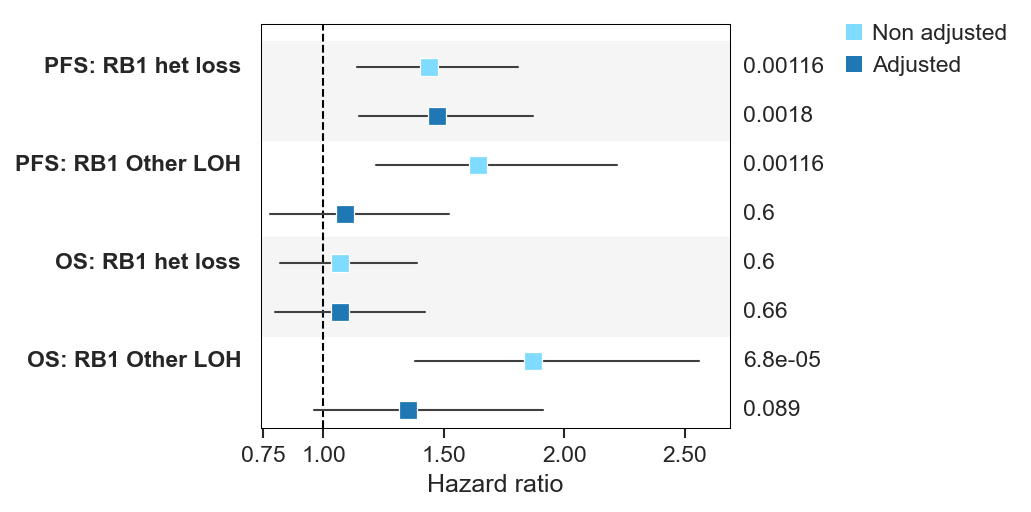

In [ ]:

plot_df = df.copy()

# position and palette
ypos = np.arange(len(plot_df))  # one y per row
plot_df['ypos'] = ypos

palette = {'uni': '#7FDBFF',      
           'multi': '#1f77b4'}   

sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(4.5, 3.5), dpi=150)

# light alternating background bands 
for i in range(0, len(plot_df), 4):
    ax.axhspan(i-0.5, i+1.5, color='0.96', zorder=0)

# reference line at HR = 1
ax.axvline(1, ls='--', lw=1, color='black', zorder=1)


for _, r in plot_df.iterrows():
    # CI bar
    ax.plot([r['CI.low'], r['CI.high']], [r['ypos'], r['ypos']],
            color='0.25', lw=1, solid_capstyle='round', zorder=2)
    # square marker at HR
    ax.scatter(r['HR'], r['ypos'],
               s=70, marker='s',
               color=palette.get(r['Uni_Multi'], '#1f77b4'),
               edgecolor='white', linewidth=0.6,
               zorder=3)

# y axis
ax.set_yticks(ypos)
ax.set_yticklabels(plot_df['comparison'])
ax.invert_yaxis()  
ax.grid(False)
#manual reannotation of labels
ax.set_yticklabels(
    [
    'PFS: RB1 het loss',
    '',
    'PFS: RB1 Other LOH',
    '',
    'OS: RB1 het loss',
    '',
    'OS: RB1 Other LOH',
    ''],
    # #put HR and confidence intervals in the y axis labels
    # [f"{row['HR']:.2f} ({row['CI.low']:.2f} - {row['CI.high']:.2f})"
    #  for _, row in plot_df.iterrows()],
    fontsize=11, 
    fontweight='bold', 
    va ='center')


# x axis
ax.set_xticks([0.75, 1, 1.5, 2, 2.5])
ax.tick_params(axis='x',
               which='major',
               bottom=True, top=False,    # draw ticks only on bottom
               length=5, width=1,         # tick mark size
               direction='out')


# major axis
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

# x range
xmin = max(0.1, plot_df['CI.low'].min()*0.95)
xmax = plot_df['CI.high'].max()*1.05
ax.set_xlim(xmin, xmax)
ax.set_xlabel('Hazard ratio')
ax.set_ylabel('')

# p values
for _, r in plot_df.iterrows():
    ax.text(xmax*1.02, r['ypos'], f"{r['p']}",
            va='center', ha='left', fontsize=11)

plt.subplots_adjust(right=0.82)

# legend
from matplotlib.lines import Line2D
square = dict(linestyle='None', marker='s', markersize=8, markeredgecolor='none')
handles = [
    Line2D([0], [0], **square, markerfacecolor=palette['uni'],  label='Non adjusted'),
    Line2D([0], [0], **square, markerfacecolor=palette['multi'], label='Adjusted'),
]
ax.legend(handles=handles,
          loc='upper left', bbox_to_anchor=(1.2, 1.05),
          frameon=False, handlelength=0.8, handletextpad=0.4, 
          fontsize=11
          )


#for modifying text in illustrator
import matplotlib as mpl
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['font.family'] = 'Arial'  

# sns.despine(left=True, bottom=False)
plt.savefig('/Users/boscoll/Desktop/Projects/Anton_RB1/results/forest_plot.svg', bbox_inches='tight')
plt.show()